In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load datasets
df1 = pd.read_csv('/content/drive/MyDrive/Infosys/BuzzFeed_fake_news_content.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Infosys/BuzzFeed_real_news_content.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Infosys/News.csv', index_col=0)
df4 = pd.read_csv('/content/drive/MyDrive/Infosys/train.csv', index_col=0)

df1.head()


,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data
0,Fake_1-Webpage,Proof The Mainstream Media Is Manipulating The...,I woke up this morning to find a variation of ...,http://www.addictinginfo.org/2016/09/19/proof-...,http://addictinginfo.addictinginfoent.netdna-c...,Wendy Gittleson,http://www.addictinginfo.org,{'$date': 1474243200000},NaN,"http://i.imgur.com/JeqZLhj.png,http://addictin...",http://addictinginfo.com/2016/09/19/proof-the-...,"{""publisher"": ""Addicting Info | The Knowledge ..."
1,Fake_10-Webpage,Charity: Clinton Foundation Distributed “Water...,Former President Bill Clinton and his Clinton ...,http://eaglerising.com/36899/charity-clinton-f...,http://eaglerising.com/wp-content/uploads/2016...,View All Posts,http://eaglerising.com,{'$date': 1474416521000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36899/charity-clinton-f...,"{""description"": ""The possibility that CHAI dis..."
2,Fake_11-Webpage,A Hillary Clinton Administration May be Entire...,After collapsing just before trying to step in...,http://eaglerising.com/36880/a-hillary-clinton...,http://eaglerising.com/wp-content/uploads/2016...,"View All Posts,Tony Elliott",http://eaglerising.com,{'$date': 1474416638000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36880/a-hillary-clinton...,"{""description"": ""Hillary Clinton may be the fi..."
3,Fake_12-Webpage,Trump’s Latest Campaign Promise May Be His Mos...,"Donald Trump is, well, deplorable. He’s sugges...",http://www.addictinginfo.org/2016/09/19/trumps...,http://addictinginfo.addictinginfoent.netdna-c...,John Prager,http://www.addictinginfo.org,{'$date': 1474243200000},NaN,"http://i.imgur.com/JeqZLhj.png,http://2.gravat...",http://addictinginfo.com/2016/09/19/trumps-lat...,"{""publisher"": ""Addicting Info | The Knowledge ..."
4,Fake_13-Webpage,Website is Down For Maintenance,Website is Down For Maintenance,http://www.proudcons.com/clinton-foundation-ca...,NaN,NaN,http://www.proudcons.com,NaN,NaN,NaN,NaN,"{""og"": {""url"": ""http://www.proudcons.com"", ""ty..."


In [ ]:
df2.head()

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data
0,Real_1-Webpage,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",http://eaglerising.com/36942/another-terrorist...,http://eaglerising.com/wp-content/uploads/2016...,"View All Posts,Leonora Cravotta",http://eaglerising.com,{'$date': 1474528230000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36942/another-terrorist...,"{""description"": ""\u201cWe believe at this poin..."
1,Real_10-Webpage,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,http://abcn.ws/2d4lNn9,http://a.abcnews.com/images/Politics/AP_donald...,"More Candace,Adam Kelsey,Abc News,More Adam",http://abcn.ws,NaN,NaN,http://www.googleadservices.com/pagead/convers...,http://abcnews.go.com/Politics/donald-trump-dr...,"{""fb_title"": ""Trump: Drugs a 'Very, Very Big F..."
2,Real_11-Webpage,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",http://rightwingnews.com/barack-obama/obama-un...,http://rightwingnews.com/wp-content/uploads/20...,Cassy Fiano,http://rightwingnews.com,{'$date': 1474476044000},https://www.youtube.com/embed/ji6pl5Vwrvk,http://rightwingnews.com/wp-content/uploads/20...,http://rightwingnews.com/barack-obama/obama-un...,"{""googlebot"": ""noimageindex"", ""og"": {""site_nam..."
3,Real_12-Webpage,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,http://politi.co/2de2qs0,http://static.politico.com/e9/11/6144cdc24e319...,"Jack Shafer,Erick Trickey,Zachary Karabell",http://politi.co,{'$date': 1474974420000},NaN,https://static.politico.com/dims4/default/8a1c...,http://www.politico.com/magazine/story/2016/09...,"{""description"": ""He sees it as zero-sum. She b..."
4,Real_13-Webpage,"President Obama Vetoes 9/11 Victims Bill, Sett...",President Obama today vetoed a bill that would...,http://abcn.ws/2dh2NFs,http://a.abcnews.com/images/US/AP_Obama_BM_201...,"John Parkinson,More John,Abc News,More Alexander",http://abcn.ws,NaN,NaN,http://www.googleadservices.com/pagead/convers...,http://abcnews.go.com/Politics/president-obama...,"{""fb_title"": ""President Obama Vetoes 9/11 Vict..."


In [ ]:
df3.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
df4.head()

,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
merged_df = pd.merge(df1, df2, on='title', how='outer', suffixes=('_df1', '_df2'))
merged_df = pd.merge(merged_df, df3, on='title', how='outer')
merged_df = pd.merge(merged_df, df4, on='title', how='outer')

# Optionally, fill missing values in merged dataset with 'Unknown' (can change as needed)
merged_df.fillna('Unknown', inplace=True)

# Set pandas to display all columns
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)  # Adjust width to avoid truncation in wide dataframes

# Print the full merged dataset (Master dataset)
print("Master Dataset (Merged):")
print(merged_df)

<ipython-input-25-a4a83bc54024>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged_df.fillna('Unknown', inplace=True)


Master Dataset (Merged):
        id_df1                                              title text_df1  url_df1 top_img_df1 authors_df1 source_df1 publish_date_df1 movies_df1 images_df1 canonical_link_df1 meta_data_df1   id_df2 text_df2  url_df2 top_img_df2 authors_df2 source_df2 publish_date_df2 movies_df2 images_df2 canonical_link_df2 meta_data_df2                                             text_x  subject               date    class       author                                             text_y    label
0      Unknown  \r\r\r\r\r\r\r\nDonald Trump Gets His A** Hand...  Unknown  Unknown     Unknown     Unknown    Unknown          Unknown    Unknown    Unknown            Unknown       Unknown  Unknown  Unknown  Unknown     Unknown     Unknown    Unknown          Unknown    Unknown    Unknown            Unknown       Unknown  A 10-year-old girl smacked down Donald Trump, ...     News  February 29, 2016      0.0      Unknown                                            Unknown  Unknown
1  

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


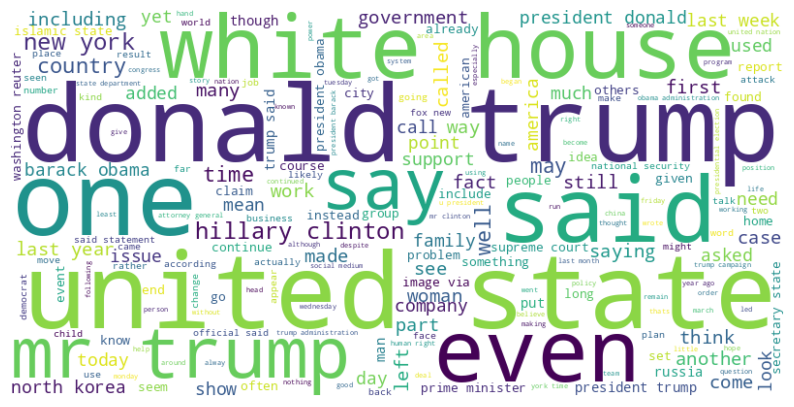

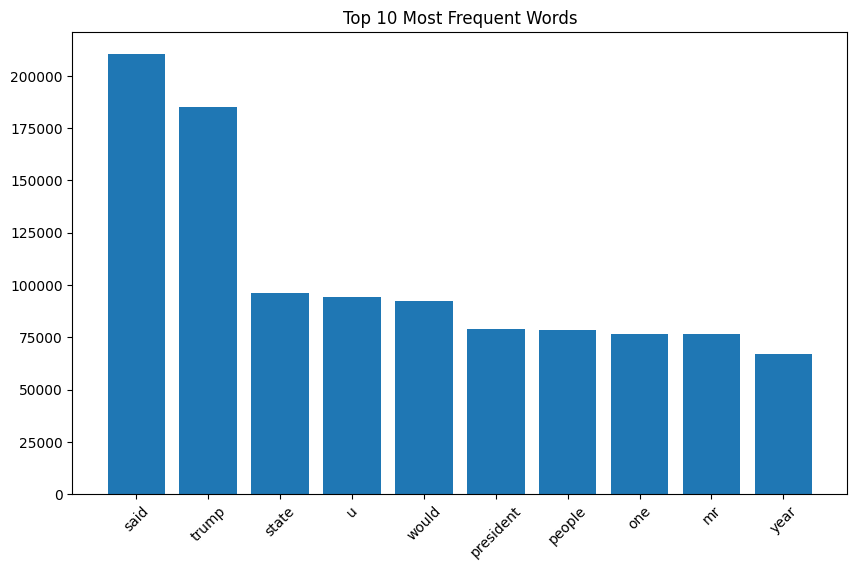

Bag of Words features (first 10): ['according' 'administration' 'also' 'america' 'american' 'attack' 'back'
 'bill' 'campaign' 'case']
TF-IDF features (first 10): ['according' 'administration' 'also' 'america' 'american' 'attack' 'back'
 'bill' 'campaign' 'case']
Bag of Words DataFrame (first 5 rows):
   according  administration  also  america  american  attack  back  bill  campaign  case  city  clinton  come  company  could  country  court  day  democrat  donald  election  even  first  former  get  go  going  government  group  hillary  house  including  know  last  law  leader  life  like  made  make  many  may  medium  member  million  month  mr  much  national  need  new  news  obama  official  one  part  party  people  percent  police  policy  political  president  presidential  public  report  republican  reuters  right  russia  said  say  security  see  show  since  state  still  support  take  thing  think  time  told  trump  two  united  vote  want  war  washington  way  week

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

import nltk
nltk.download('omw-1.4')



nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Remove non-alphabetic characters (special characters, numbers)
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize text
    tokens = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)


final_df['processed_text'] = final_df['text'].apply(preprocess_text)

# 1. Word Cloud Visualization
# Join all processed text to create a single string for word cloud generation
all_text = " ".join(final_df['processed_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 2. Most Frequent Words (Top 10 words)
word_list = " ".join(final_df['processed_text']).split()
word_freq = Counter(word_list)
top_10_words = word_freq.most_common(10)

# Plot the most common words
words, counts = zip(*top_10_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()

# 3. Bag of Words Vectorization
count_vectorizer = CountVectorizer(max_features=100)
X_bow = count_vectorizer.fit_transform(final_df['processed_text'])
bow_feature_names = count_vectorizer.get_feature_names_out()

# Display the first 10 words from the Bag of Words model
print("Bag of Words features (first 10):", bow_feature_names[:10])

# 4. TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=100)
X_tfidf = tfidf_vectorizer.fit_transform(final_df['processed_text'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Display the first 10 words from the TF-IDF model
print("TF-IDF features (first 10):", tfidf_feature_names[:10])

# Optional: Convert the vectorized data into DataFrame for better viewing
bow_df = pd.DataFrame(X_bow.toarray(), columns=bow_feature_names)
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_feature_names)

# Display the first 5 rows of the Bag of Words and TF-IDF DataFrames
print("Bag of Words DataFrame (first 5 rows):")
print(bow_df.head())

print("\nTF-IDF DataFrame (first 5 rows):")
print(tfidf_df.head())


In [ ]:
final

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Train Data:
   id                                              title              author                                               text  label
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus  House Dem Aide: We Didn’t Even See Comey’s Let...      1
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn  Ever get the feeling your life circles the rou...      0
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com  Why the Truth Might Get You Fired October 29, ...      1
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss  Videos 15 Civilians Killed In Single US Airstr...      1
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy  Print \nAn Iranian woman has been sentenced to...      1

Fake News Data:
                id                                              title                                               text                                         

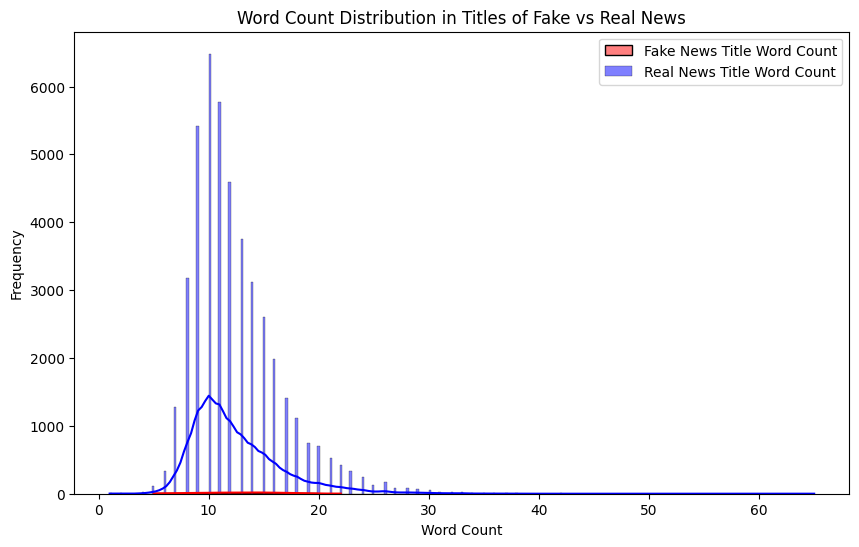

<ipython-input-46-dc7ff2fb8fc5>:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(tokens), palette="viridis")


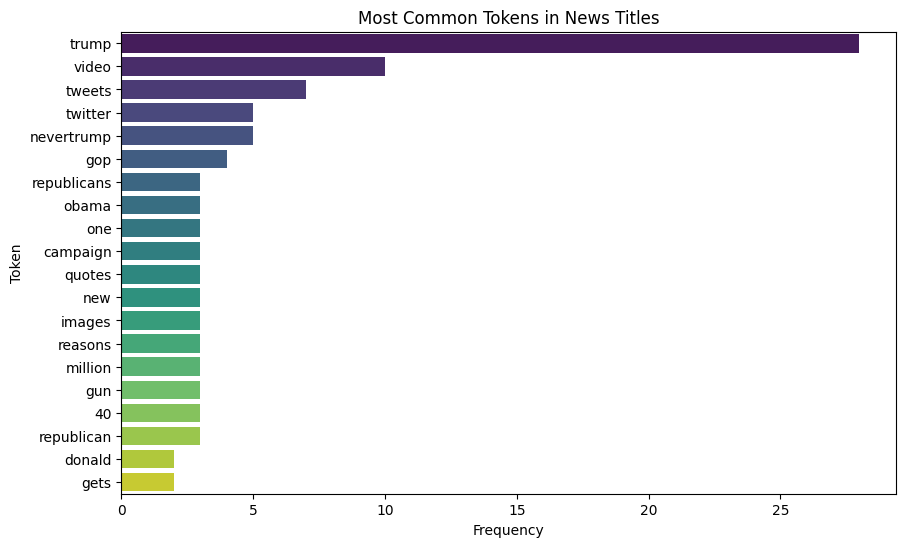

<ipython-input-46-dc7ff2fb8fc5>:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sources.values, y=top_sources.index, palette='viridis')


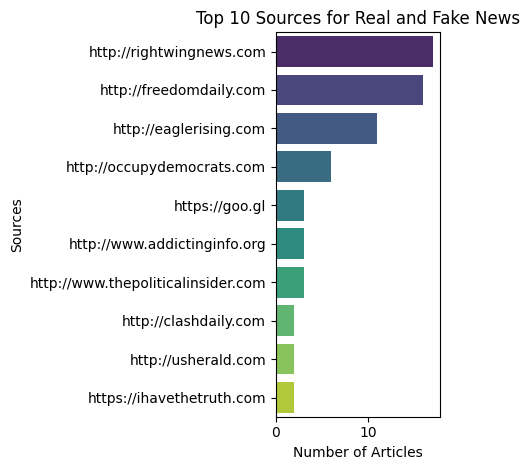

The 'text_length' column does not exist in the DataFrame.


<Figure size 1400x1000 with 0 Axes>

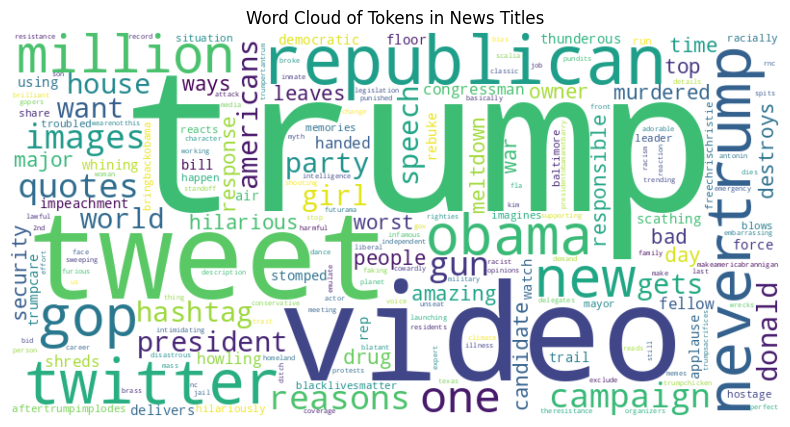


Sample 1:



Tokens: ['donald', 'trump', 'gets', 'handed', 'girl', 'video']
Lemmatized: ['donald', 'trump', 'get', 'handed', 'girl', 'video']
Stemmed: ['donald', 'trump', 'get', 'hand', 'girl', 'video']

Sample 2:



Tokens: ['congressman', 'shreds', 'fellow', 'republicans', 'howling', 'trump', 'impeachment', 'video']
Lemmatized: ['congressman', 'shred', 'fellow', 'republican', 'howling', 'trump', 'impeachment', 'video']
Stemmed: ['congressman', 'shred', 'fellow', 'republican', 'howl', 'trump', 'impeach', 'video']

Sample 3:



Tokens: ['trump', 'gets', 'stomped', 'whining', 'president', 'obama', 'using', 'air', 'force', 'one', 'campaign', 'trail']
Lemmatized: ['trump', 'get', 'stomped', 'whining', 'president', 'obama', 'using', 'air', 'force', 'one', 'campaign', 'trail']
Stemmed: ['trump', 'get', 'stomp', 'whine', 'presid', 'obama', 'use', 'air', 'forc', 'one', 'campaign', 'trail']

Sample 4:



Tokens: ['watch', 'democratic', 'rep', 'delivers', 'scathing', 'rebuke', 'trumpcare', 'bi

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
import nltk
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter


nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Load datasets
train_data = pd.read_csv(r'/content/drive/MyDrive/Infosys/train.csv')
fake_news_data = pd.read_csv(r'/content/drive/MyDrive/Infosys/BuzzFeed_fake_news_content.csv')
news_data = pd.read_csv(r'/content/drive/MyDrive/Infosys/News.csv')



print("Train Data:")
print(train_data.head())
print("\nFake News Data:")
print(fake_news_data.head())
print("\nNews Data:")
print(news_data.head())

# Merge datasets on 'title' column if available
merged_data = pd.merge(fake_news_data, news_data, on='title', how='outer')
print("\nMerged Data:")
print(merged_data.head())

# Word count distribution in titles of fake vs real news
fake_news_data['word_count'] = fake_news_data['title'].apply(lambda x: len(str(x).split()))
news_data['word_count'] = news_data['title'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
sns.histplot(fake_news_data['word_count'], color="red", label="Fake News Title Word Count", kde=True)
sns.histplot(news_data['word_count'], color="blue", label="Real News Title Word Count", kde=True)
plt.legend()
plt.title("Word Count Distribution in Titles of Fake vs Real News")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

# NLP Techniques: Tokenization, Lemmatization, and Stemming on Merged Data Titles
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess_text(text):

    tokens = word_tokenize(str(text).lower())
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    stemmed = [stemmer.stem(word) for word in tokens]
    return {
        'original': text,
        'tokens': tokens,
        'lemmatized': lemmatized,
        'stemmed': stemmed
    }


merged_data_sample = merged_data['title'].dropna().head(50).apply(preprocess_text)

# Visualize Most Common Tokens after Preprocessing
all_tokens = [token for item in merged_data_sample for token in item['tokens']]
token_counts = Counter(all_tokens)
most_common_tokens = token_counts.most_common(20)

# Bar chart for most common tokens
tokens, counts = zip(*most_common_tokens)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(tokens), palette="viridis")
plt.title("Most Common Tokens in News Titles")
plt.xlabel("Frequency")
plt.ylabel("Token")
plt.show()




# Count Plot of Top 10 Sources for Real and Fake News
# 4. Text Length Box Plot
if 'text_length' in merged_data.columns:
    plt.subplot(1, 2, 1)  # Adjusted to fit side by side in a single row
    sns.boxplot(data=merged_data, x='label', y='text_length', palette='Set3')
    plt.title("Text Length Distribution by News Type")
    plt.xlabel("News Type")
    plt.ylabel("Text Length")

# 5. Top 10 Sources Bar Plot
top_sources = merged_data['source'].value_counts().nlargest(10)  # Ensure 'source' is the correct column name
plt.subplot(1, 2, 2)  # Placing this on the second subplot
sns.barplot(x=top_sources.values, y=top_sources.index, palette='viridis')
plt.title("Top 10 Sources for Real and Fake News")
plt.xlabel("Number of Articles")
plt.ylabel("Sources")

# Show the plots with tight layout
plt.tight_layout()
plt.show()


import matplotlib.pyplot as plt
import seaborn as sns

# Initialize a figure with a specific layout
plt.figure(figsize=(14, 10))



# 6. Distribution of text length by news type
if 'text_length' in merged_data.columns:
    plt.subplot(1, 2, 2)
    sns.histplot(data=merged_data, x='text_length', hue='label', bins=30, kde=True, palette='Set1')
    plt.title("Distribution of Text Length by News Type")
    plt.xlabel("Token")
    plt.ylabel("Frequency")
else:
    print("The 'text_length' column does not exist in the DataFrame.")

plt.tight_layout()
plt.show()

# Generate Word Cloud for Merged Titles
all_text = " ".join([" ".join(item['tokens']) for item in merged_data_sample])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Tokens in News Titles")
plt.show()

# Print tokenization, lemmatization, and stemming results for sample texts
for idx, processed_text in enumerate(merged_data_sample[:5]):
    print(f"\nSample {idx+1}:")
    print("Original Text:", processed_text['original'])
    print("Tokens:", processed_text['tokens'])
    print("Lemmatized:", processed_text['lemmatized'])
    print("Stemmed:", processed_text['stemmed'])
